In [21]:
import matplotlib.pyplot as plt
import cairo
import numpy as np
import tempfile
import threading

plt.ion
def measure(scData, micData, fs, latency):
    timeDiff = correlate(scData, micData, fs)
    speedOfSound = 343
    realDiff = timeDiff - latency
    distance = speedOfSound*realDiff  
    return timeDiff, distance

def measureTimeOfArrival(sample, micData, fs):
    timeDiff, acor = correlate(sample, micData, fs)
    speedOfSound = 343
    distance = speedOfSound*timeDiff    
    return timeDiff, distance

def correlate(baseSample, data, fs):
    correlation_array = np.abs(np.correlate(data,baseSample,"full"));
    I = np.argmax(correlation_array)
    timeDiff = (I-(len(baseSample)-1))/fs
    print("max Sample #: ",I,"Time Difference (s): ", timeDiff)
    return timeDiff, correlation_array

In [22]:
# simple cross correlation test
# original sample
x=[1,2,0,4,3]
# sample with short delay
xd=[0,0,0,0,0,0,0,1,2,0,4,3,0,0,0]
# sample with longer delay
xl=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,4,3,0,0,0,0,0,0,0]

xd_x = np.correlate(xd,x,"full")
print(xd_x, ' max lag index:', np.argmax(xd_x))
xl_x = np.correlate(xl,x,"full")
print(xl_x, ' max lag index:', np.argmax(xl_x))
# delayed sample with the calculated lag - signal length removed
diff = np.argmax(xl_x) - (len(x)-1)
print(xl[diff:])

[ 0  0  0  0  0  0  0  3 10  8 14 30 14  8 10  3  0  0  0]  max lag index: 11
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3 10  8 14 30 14
  8 10  3  0  0  0  0  0  0  0]  max lag index: 23
[1, 2, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0]


max Sample #:  1099 Time Difference (s):  1.0
(1.0, 343.0)
max Sample #:  2099 Time Difference (s):  2.0
Test (2.0, 686.0)
max Sample #:  1399 Time Difference (s):  1.3
max Sample #:  2899 Time Difference (s):  2.8
time differece (s):  1.5  distance (m):  514.5


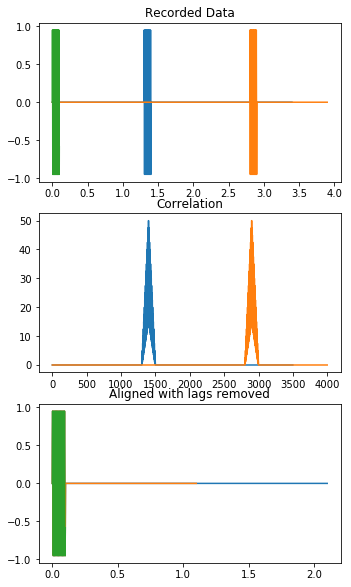

In [23]:
# Cross correlation of a short cosine waveform
# Generate cosine waveform
fs = 1000
freq = 100
samples = (np.sin(2*np.pi*np.arange(fs*(1/fs*100))*freq/fs)).astype(np.float32)
# Add 1s delay by zero padding
paddedSample = np.append(np.zeros(fs * (1)), np.append(samples, np.zeros(fs * (2))))
print(measureTimeOfArrival(samples, paddedSample, fs))
# Add additional 1s delay
print("Test",measureTimeOfArrival(samples, np.append(np.zeros(int(fs * (1))), paddedSample), fs))

# TDOA Test
# Create 2 samples with different delays
firstSample = np.append(np.zeros(int(fs * (1.3))), np.append(samples, np.zeros(int(fs * (2)))))
secondSample = np.append(np.zeros(int(fs * (2.8))), np.append(samples, np.zeros(int(fs * (1)))))

f, ((ax1, ax2, ax3)) = plt.subplots(3,1)
ax1.set_title('Recorded Data')
ax2.set_title('Correlation')
ax3.set_title('Aligned with lags removed')
t0 = np.arange(0,len(samples))/fs;
t1 = np.arange(0,len(firstSample))/fs;
t2 = np.arange(0,len(secondSample))/fs;
ax1.plot(t1, firstSample)
ax1.plot(t2,secondSample)
ax1.plot(t0, samples)    

timeDiff1, acor1 = correlate(samples, firstSample, fs)
timeDiff2, acor2 = correlate(samples, secondSample, fs)
timeDiff = timeDiff2 - timeDiff1
speedOfSound = 343
distance = speedOfSound*timeDiff

ax2.plot(np.arange(0,len(acor1)),acor1)
ax2.plot(np.arange(0,len(acor2)),acor2)

I = np.argmax(acor1)- (len(samples)-1)
Dataal1 = firstSample[I:]
t1al = np.arange(0,len(Dataal1))/fs
I = np.argmax(acor2)- (len(samples)-1)
Dataal2 = secondSample[I:]
t2al = np.arange(0,len(Dataal2))/fs

ax3.plot(t1al,Dataal1)
ax3.plot(t2al,Dataal2)
ax3.plot(t0,samples)
plt.subplots_adjust(left=0.2, wspace=0.8, top=2)
plt.draw()
print('time differece (s): ',timeDiff, ' distance (m): ', distance)

plt.savefig('foo.png', bbox_inches='tight')
plt.show()